# Installing and importing the necessary libraries

In [ ]:
!pip install ultralytics==8.0.196
!pip install roboflow
#!pip install ultralytics
from ultralytics import YOLO

from roboflow import Roboflow
rf = Roboflow(api_key="3tPsMkbniWwEi7YBOh4J")
project = rf.workspace("labeler-projects").project("barcodes-zmxjq")
dataset = project.version(5).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Barcodes-5 in yolov8:: 100%|██████████| 63032/63032 [00:16<00:00, 3723.16it/s]


# Mount the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
HOME=os.getcwd()
print(HOME)
# create a dirctory for dataset
!mkdir {HOME}/datasets
%cd {HOME}/datasets


/content
/content/datasets


# Install and connect to wandb

In [ ]:
# install ultralytics again if necessary
#!pip install ultralytics
from ultralytics import YOLO
!pip install wandb
import wandb
!wandb login


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.9 MB/s eta 0:00:00
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


# Create a project and enter the name of the run file

In [ ]:
wandb.init(project='Demo1', name=f"test4")

wandb: Currently logged in as: shriyachowdhury24 (ymny). Use `wandb login --relogin` to force relogin


In [ ]:
wandb.run.id

'032ukvhi'

# Resume run from previous epoch in the same project

In [ ]:
wandb.init(project='Demo1', id='032ukvhi', resume=True)

# Train the model

In [ ]:
model1 = YOLO('yolov8n.pt')
results = model1.train(save_period = 1,data=f"{dataset.location}/data.yaml",batch=32,epochs=50,plots=True)

100%|██████████| 6.23M/6.23M [00:00<00:00, 110MB/s]
New https://pypi.org/project/ultralytics/8.0.231 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Barcodes-5/data.yaml, epochs=50, patience=50, batch=32, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=Fals

KeyboardInterrupt: ignored

#save the weights in the folder

In [ ]:
import locale
print(locale.getpreferredencoding())
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!scp -r /content/runs '/content/drive/My Drive/object detection9/runs8'

UTF-8


# Run and resume the pretrained model

In [25]:
wandb.init(project='Demo1', id='032ukvhi', resume=True)
#model1=YOLO('required pt file path')
model1=YOLO('/content/drive/My Drive/object detection9/runs8/runs/detect/train/weights/epoch2.pt')
model1.train(resume=True, save=True, save_period=1, data=f"{dataset.location}/data.yaml")

New https://pypi.org/project/ultralytics/8.0.231 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/My Drive/object detection9/runs8/runs/detect/train/weights/epoch2.pt, data=/content/Barcodes-5/data.yaml, epochs=50, patience=50, batch=32, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=

KeyboardInterrupt: ignored

# save the weights in the required folder

In [26]:
import locale
print(locale.getpreferredencoding())
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!scp -r /content/runs '/content/drive/My Drive/object detection9/runs8'

UTF-8


# Validate the model

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model=/epoch50.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
100% 755k/755k [00:00<00:00, 23.6MB/s]
val: Scanning /content/Barcodes-5/valid/labels... 2382 images, 46 backgrounds, 0 corrupt: 100% 2382/2382 [00:01<00:00, 2235.74it/s]
val: New cache created: /content/Barcodes-5/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 149/149 [00:35<00:00,  4.21it/s]
                   all       2382       2477      0.878      0.919      0.921      0.652
               Barcode       2382       2194      0.947      0.969      0.973      0.702
               QR Code       2382        283       0.81      0.869      0.869      0.602
Speed: 0.4ms preprocess, 8.5ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# Inference

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/epoch50.pt conf=0.25 source=/content/Images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/26 /content/Images/WhatsApp Image 2023-12-30 at 20.25.00.jpeg: 512x640 1 Barcode, 124.6ms
image 2/26 /content/Images/WhatsApp Image 2023-12-30 at 20.25.01 (1).jpeg: 448x640 1 Barcode, 69.3ms
image 3/26 /content/Images/WhatsApp Image 2023-12-30 at 20.25.01 (2).jpeg: 480x640 3 Barcodes, 2 QR Codes, 68.5ms
image 4/26 /content/Images/WhatsApp Image 2023-12-30 at 20.25.01.jpeg: 640x480 1 Barcode, 78.5ms
image 5/26 /content/Images/WhatsApp Image 2023-12-30 at 20.25.02 (1).jpeg: 640x480 1 Barcode, 12.1ms
image 6/26 /content/Images/WhatsApp Image 2023-12-30 at 20.25.02.jpeg: 640x480 2 Barcodes, 12.1ms
image 7/26 /content/Images/WhatsApp Image 2023-12-30 at 20.25.03 (1).jpeg: 640x480 1 Barcode, 12.0ms
image 8/26 /content/Images/WhatsApp Image 2023-12-30 at 20.25.03 (2).jpeg: 640x512 1 Barcode, 70.1ms
image 9/26

# Saving the cropped images

In [ ]:
!yolo predict model=/epoch50.pt source='/content/Images' save_crop

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/26 /content/Images/WhatsApp Image 2023-12-30 at 20.25.00.jpeg: 512x640 1 Barcode, 111.2ms
image 2/26 /content/Images/WhatsApp Image 2023-12-30 at 20.25.01 (1).jpeg: 448x640 1 Barcode, 73.6ms
image 3/26 /content/Images/WhatsApp Image 2023-12-30 at 20.25.01 (2).jpeg: 480x640 3 Barcodes, 2 QR Codes, 66.5ms
image 4/26 /content/Images/WhatsApp Image 2023-12-30 at 20.25.01.jpeg: 640x480 1 Barcode, 68.7ms
image 5/26 /content/Images/WhatsApp Image 2023-12-30 at 20.25.02 (1).jpeg: 640x480 1 Barcode, 12.0ms
image 6/26 /content/Images/WhatsApp Image 2023-12-30 at 20.25.02.jpeg: 640x480 2 Barcodes, 12.1ms
image 7/26 /content/Images/WhatsApp Image 2023-12-30 at 20.25.03 (1).jpeg: 640x480 1 Barcode, 12.1ms
image 8/26 /content/Images/WhatsApp Image 2023-12-30 at 20.25.03 (2).jpeg: 640x512 1 Barcode, 70.6ms
image 9/26 /content

# save the weights file in the required folder

In [ ]:
import locale
print(locale.getpreferredencoding())
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!scp -r /content/datasets/runs '/content/drive/My Drive/object detection9/runs4'

ANSI_X3.4-1968


# To display the results

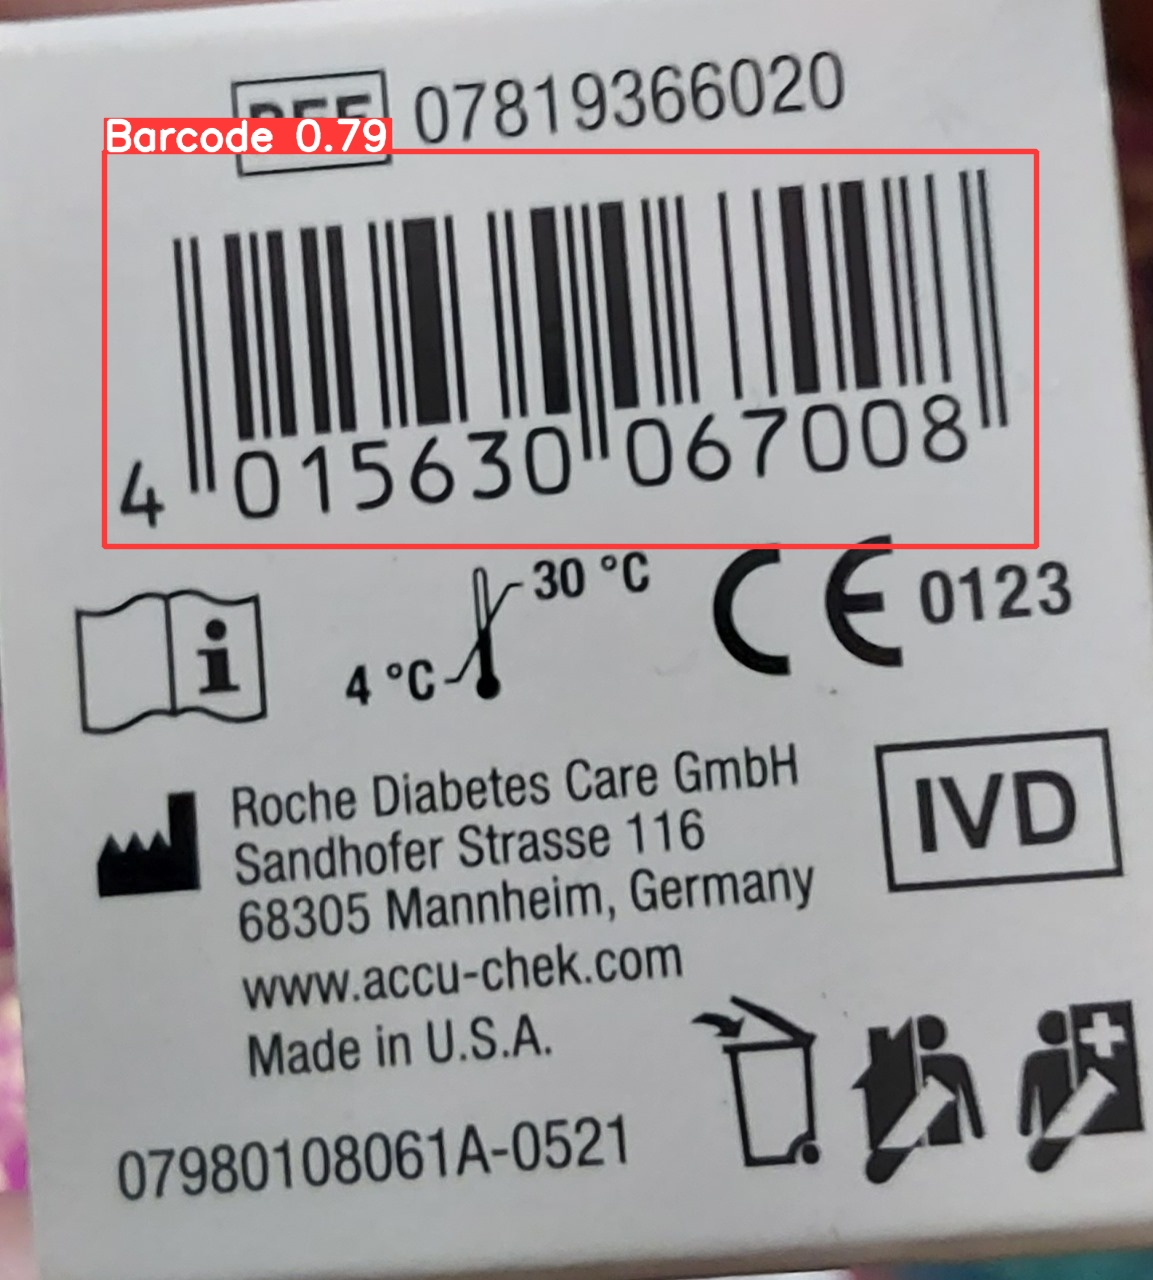

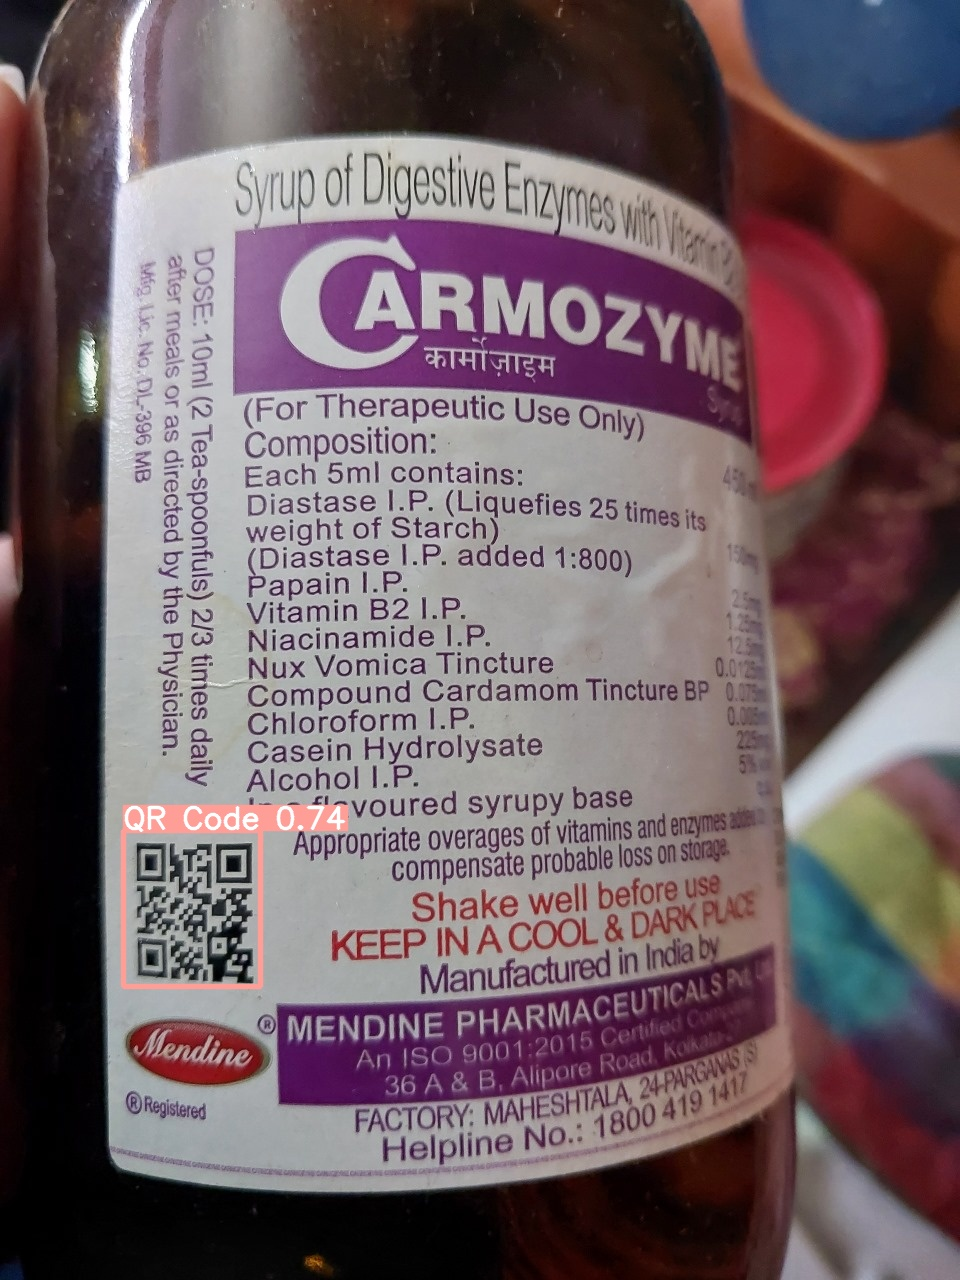

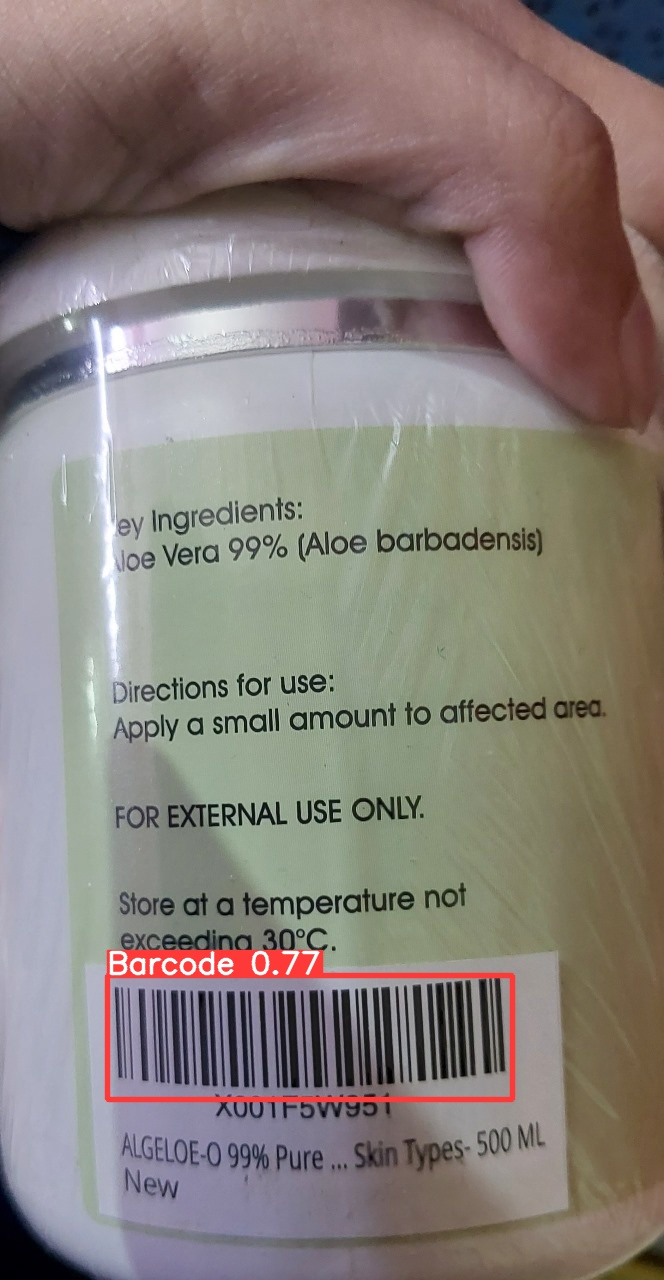

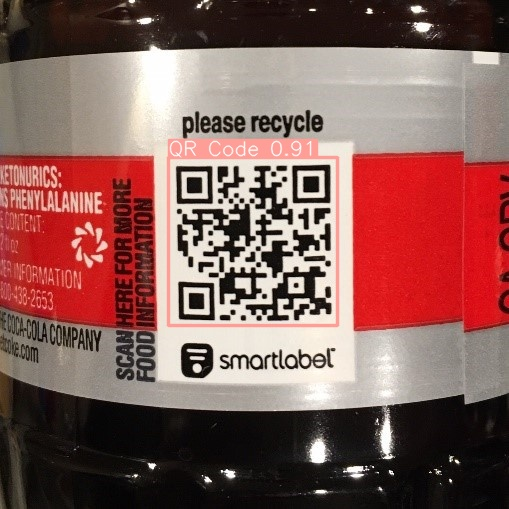

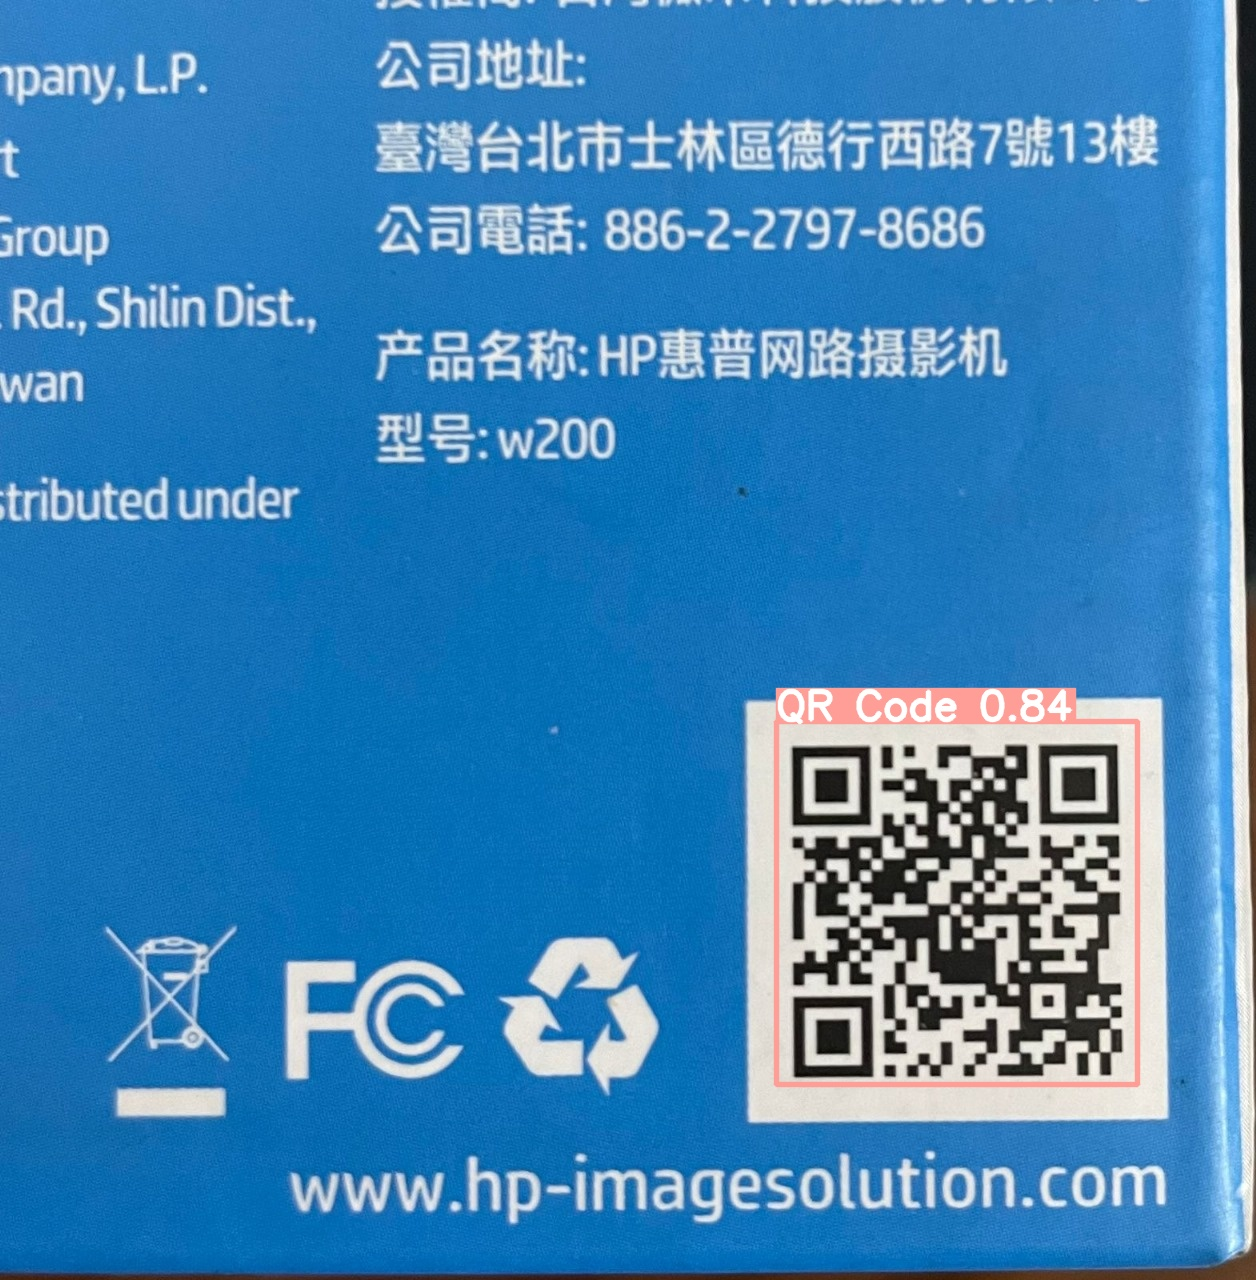

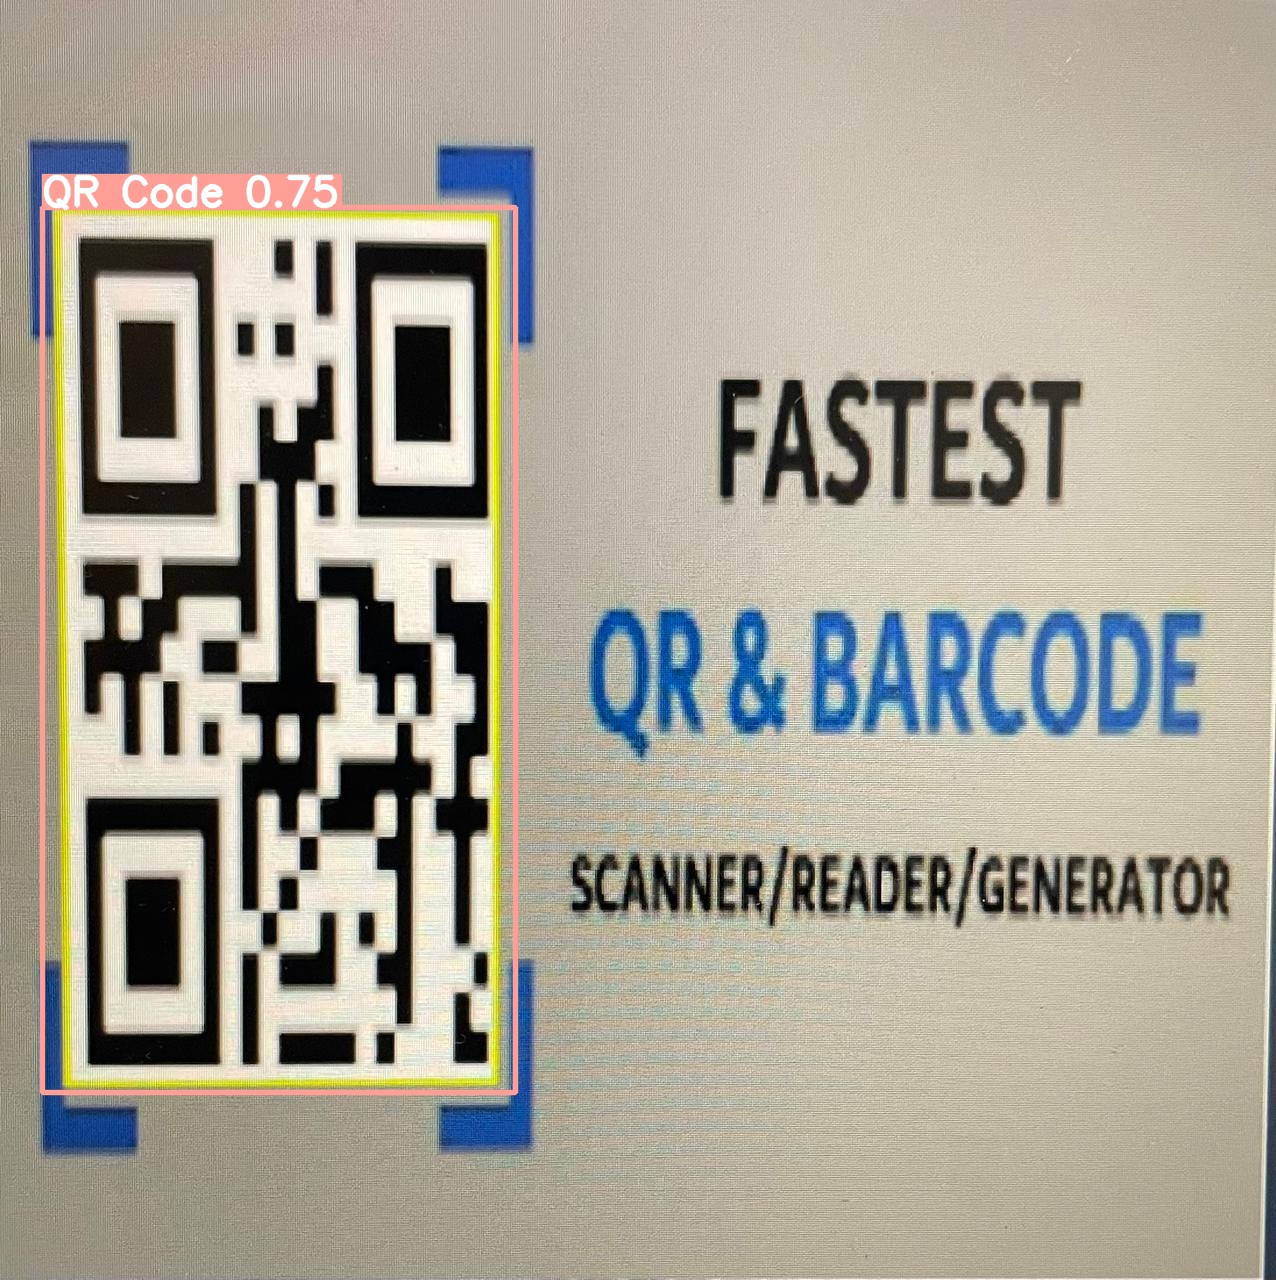

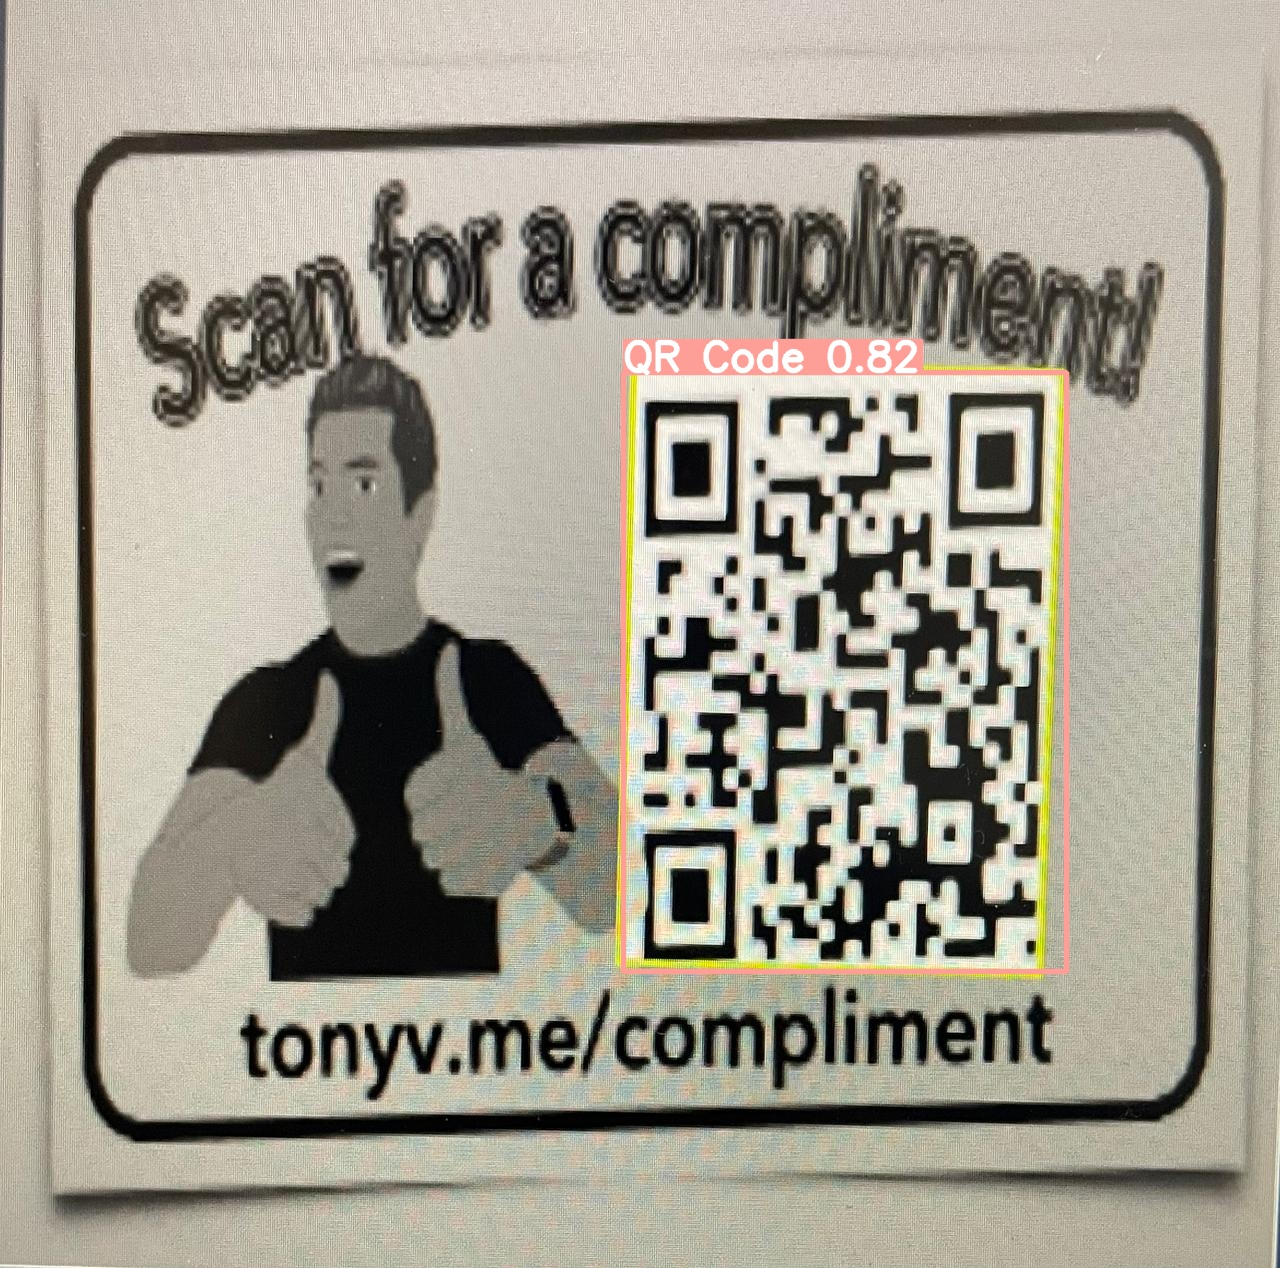

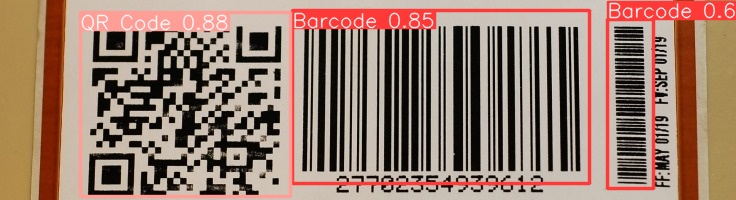

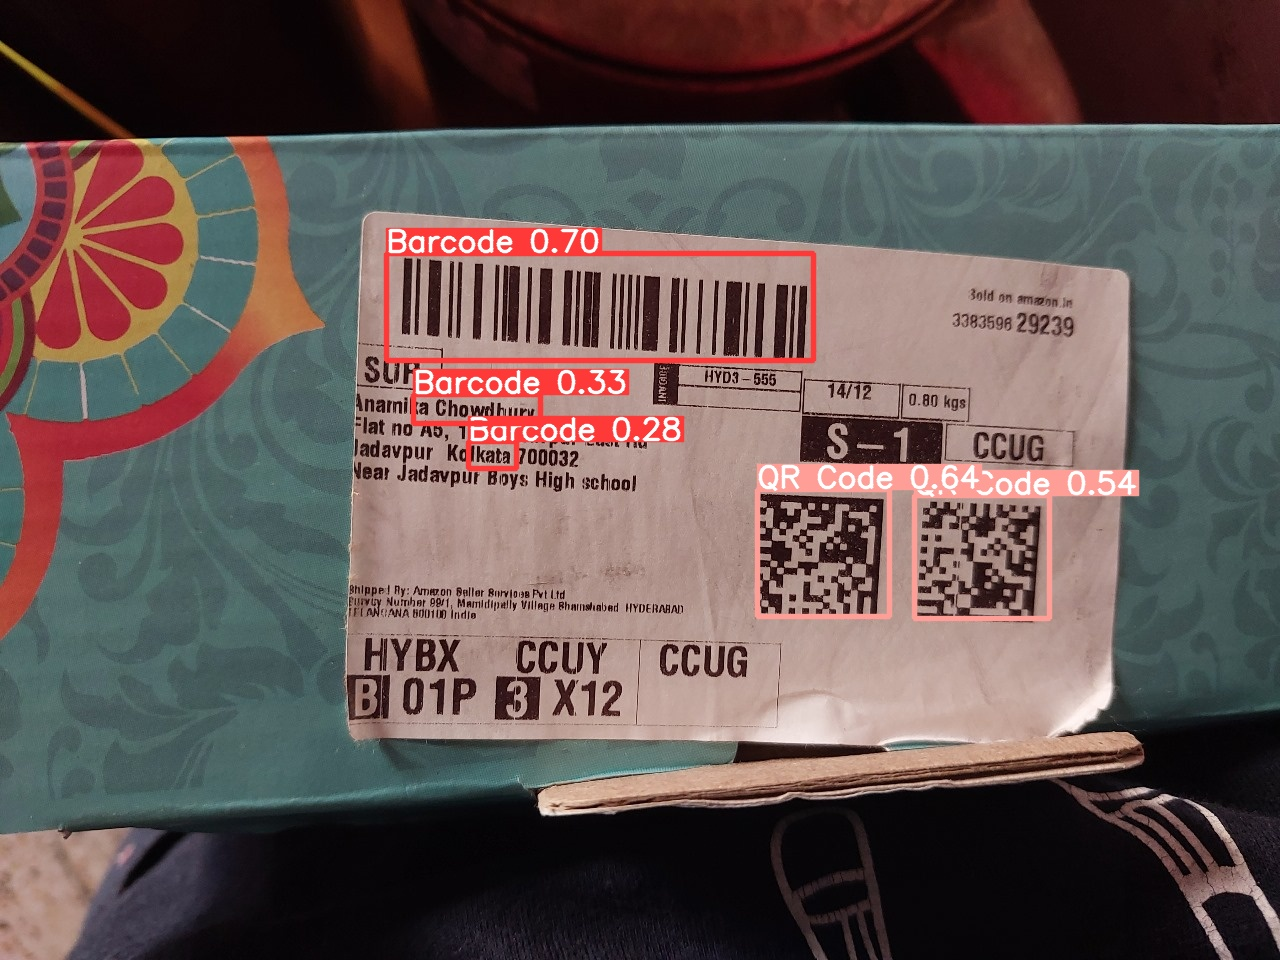

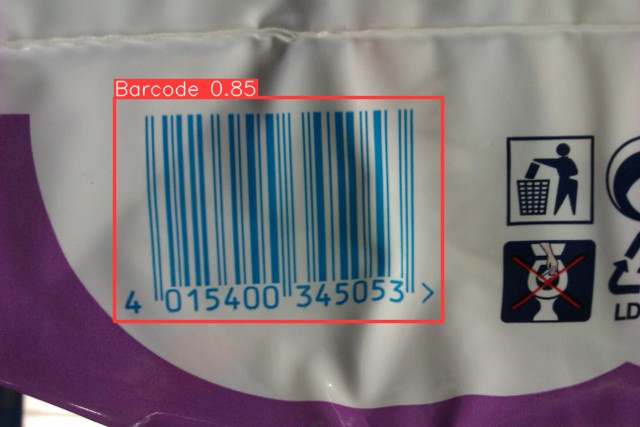

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/*.[jJpP][pPnN][eE][gG]')[:10]:
      display(Image(filename=image_path, width=500))
      print("\n")